# 코호트 분석
- 추천수 전환율이 높은 그룹과 낮은 그룹
- 전환율이란 조회수 대비 추천수가 많이 나온 작품을 뜻함.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib import rc
rc('font', family='NanumGothic')

# 데이터 불러오기

In [3]:
# 데이터 불러오기
data = pd.read_csv('munpia_novel_data.csv')

# 데이터 전처리

In [4]:
# 전처리: view_count와 recommend_count를 숫자로 변환
data['view_count'] = data['view_count'].str.replace(',', '').astype(int)
data['recommend_count'] = data['recommend_count'].str.replace(',', '').astype(int)
data['series_count'] = data['series_count'].str.replace('회', '').str.replace(',', '').str.strip().astype(int)

# 그룹화

In [5]:
# 전환율 계산
data['conversion_rate'] = data['recommend_count'] / data['view_count']

In [6]:
# 그룹 나누기: 전환율 기준으로 상위 50%와 하위 50% 분리
threshold = data['conversion_rate'].median()
high_conversion_group = data[data['conversion_rate'] > threshold]
low_conversion_group = data[data['conversion_rate'] <= threshold]

# 시각화

전환율 높은 그룹 평균 조회수: 1667546.17
전환율 낮은 그룹 평균 조회수: 804512.79


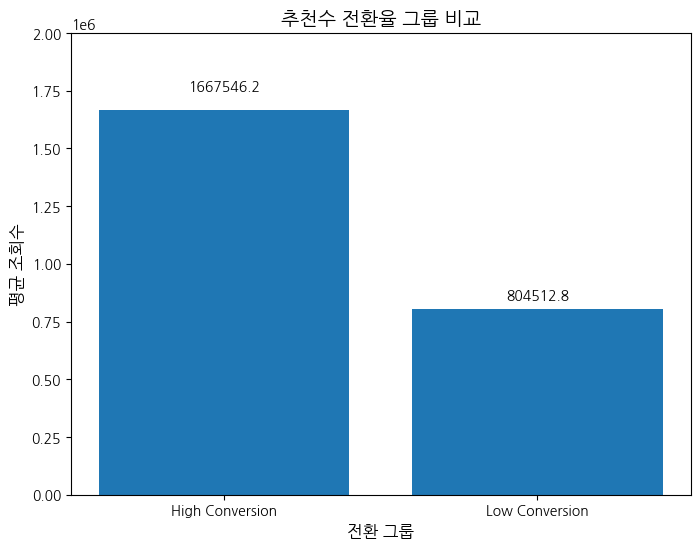

In [7]:
# 각 그룹의 조회수 평균 계산
high_view_mean = high_conversion_group['view_count'].mean()
low_view_mean = low_conversion_group['view_count'].mean()

# 결과 출력
print(f"전환율 높은 그룹 평균 조회수: {high_view_mean:.2f}")
print(f"전환율 낮은 그룹 평균 조회수: {low_view_mean:.2f}")

# 시각화: 막대 그래프
plt.figure(figsize=(8, 6))
group_labels = ['High Conversion', 'Low Conversion']
view_means = [high_view_mean, low_view_mean]
plt.bar(group_labels, view_means)
plt.title('추천수 전환율 그룹 비교', fontsize=14)
plt.ylabel('평균 조회수', fontsize=12)
plt.xlabel('전환 그룹', fontsize=12)
plt.ylim(0, max(view_means) * 1.2)  # Y축 범위를 적절히 조정
plt.text(0, high_view_mean + 0.05 * high_view_mean, f"{high_view_mean:.1f}", ha='center', fontsize=10)
plt.text(1, low_view_mean + 0.05 * low_view_mean, f"{low_view_mean:.1f}", ha='center', fontsize=10)

# 그래프 출력
plt.show()


# 코호트 분석 2
- 제목 길이별 추천수

  Title Length Group (Chars)  Average Recommendation Count
0                       2~9자                  15748.780500
1                      9~12자                  39728.035162
2                     12~15자                  43405.901559
3                     15~18자                  42121.925518
4                     18~35자                  32770.233261


C:\Users\신형우\AppData\Local\Temp\ipykernel_13744\4141038762.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('title_length_group')['recommend_count'].mean().reset_index()


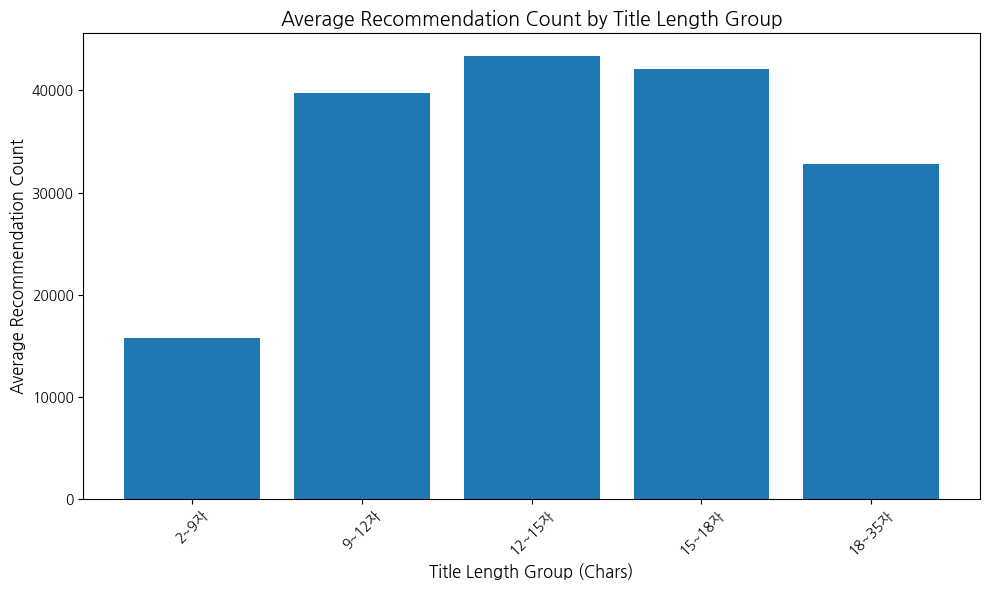

In [8]:
# 제목 길이 계산
data['title_length'] = data['title'].str.len()

# 제목 길이를 5개의 구간으로 나누고 각 구간의 범위를 저장
bins = pd.qcut(data['title_length'], q=5, retbins=True, labels=False)[1]

# 구간 이름을 범위로 설정
bin_labels = [f"{int(bins[i])}~{int(bins[i+1])}자" for i in range(len(bins)-1)]

# 제목 길이를 5그룹으로 나누기
data['title_length_group'] = pd.qcut(data['title_length'], q=5, labels=bin_labels)

# 각 그룹의 평균 추천 수 계산
grouped_data = data.groupby('title_length_group')['recommend_count'].mean().reset_index()

# 그룹 이름과 평균 추천 수
grouped_data.columns = ['Title Length Group (Chars)', 'Average Recommendation Count']

# 결과 출력
print(grouped_data)

# 시각화: 막대 그래프
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Title Length Group (Chars)'], grouped_data['Average Recommendation Count'])

# 그래프 꾸미기
plt.title('Average Recommendation Count by Title Length Group', fontsize=14)
plt.ylabel('Average Recommendation Count', fontsize=12)
plt.xlabel('Title Length Group (Chars)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()


C:\Users\신형우\AppData\Local\Temp\ipykernel_13744\3227360182.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('title_length_group')['recommend_count'].mean().reset_index()


  Title Length Group (Chars)  Average Recommendation Count
0                       2~6자                   7080.154412
1                       6~9자                  23943.946375
2                      9~11자                  40725.089623
3                     11~12자                  38255.034843
4                     12~14자                  43917.436278
5                     14~15자                  42072.674868
6                     15~16자                  43456.637184
7                     16~18자                  41375.026263
8                     18~20자                  32655.067153
9                     20~35자                  32882.291193


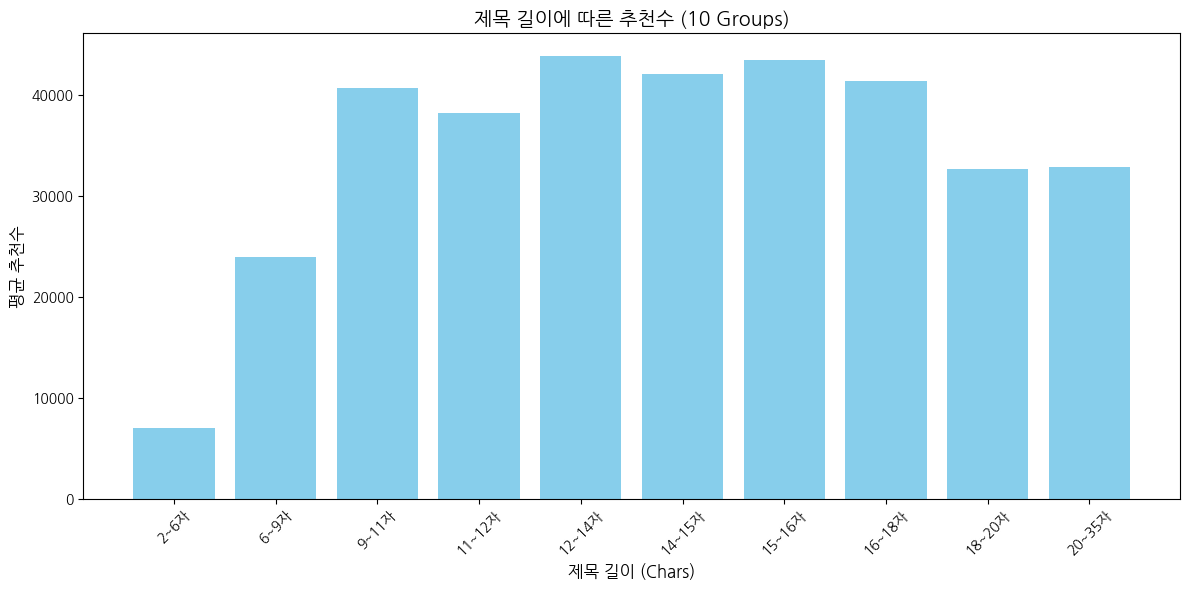

In [9]:
# 제목 길이 계산
data['title_length'] = data['title'].str.len()

# 제목 길이를 10개의 구간으로 나누고 각 구간의 범위를 저장
bins = pd.qcut(data['title_length'], q=10, retbins=True, labels=False)[1]

# 구간 이름을 범위로 설정
bin_labels = [f"{int(bins[i])}~{int(bins[i+1])}자" for i in range(len(bins)-1)]

# 제목 길이를 10그룹으로 나누기
data['title_length_group'] = pd.qcut(data['title_length'], q=10, labels=bin_labels)

# 각 그룹의 평균 추천 수 계산
grouped_data = data.groupby('title_length_group')['recommend_count'].mean().reset_index()

# 그룹 이름과 평균 추천 수
grouped_data.columns = ['Title Length Group (Chars)', 'Average Recommendation Count']

# 결과 출력
print(grouped_data)

# 시각화: 막대 그래프
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['Title Length Group (Chars)'], grouped_data['Average Recommendation Count'], color='skyblue')

# 그래프 꾸미기
plt.title('제목 길이에 따른 추천수 (10 Groups)', fontsize=14)
plt.ylabel('평균 추천수', fontsize=12)
plt.xlabel('제목 길이 (Chars)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()


  태그 수 그룹       평균 추천 수        평균 조회수
0    1~2개  33213.990188  1.208669e+06
1    3~4개  37183.043393  1.261735e+06
2    5~6개  38926.299225  1.347754e+06
3    7~8개  33660.655914  1.216852e+06
4   9~10개  36937.618654  1.335842e+06


C:\Users\신형우\AppData\Local\Temp\ipykernel_13744\1337708869.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('tag_count_group')[['recommend_count', 'view_count']].mean().reset_index()


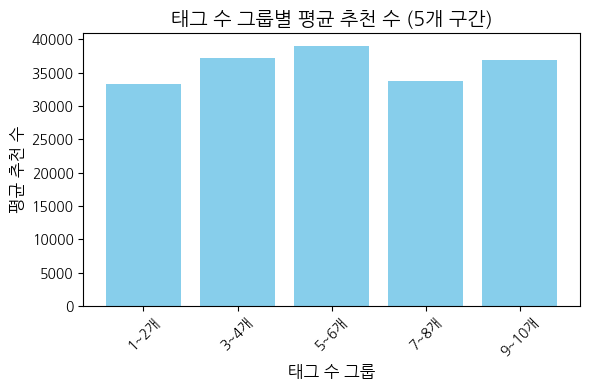

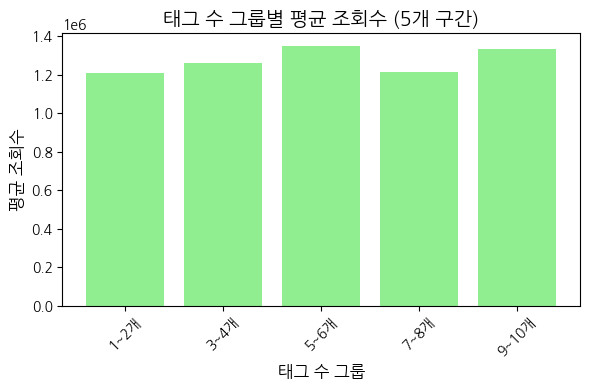

In [15]:
# 태그 수 계산 (쉼표로 구분된 태그 개수)
data['tag_count'] = data['tags'].fillna('').apply(lambda x: len(x.split(',')))

# 태그 수를 5개의 구간으로 나누기 (직접 구간 설정)
bins = [0, 2, 4, 6, 8, data['tag_count'].max()]  # 태그 수 구간 설정
bin_labels = ["1~2개", "3~4개", "5~6개", "7~8개", f"9~{data['tag_count'].max()}개"]  # 범위 레이블 생성
data['tag_count_group'] = pd.cut(data['tag_count'], bins=bins, labels=bin_labels, include_lowest=True)

# 그룹별 평균 추천 수 및 평균 조회수 계산
grouped_data = data.groupby('tag_count_group')[['recommend_count', 'view_count']].mean().reset_index()
grouped_data.columns = ['태그 수 그룹', '평균 추천 수', '평균 조회수']

# 결과 출력
print(grouped_data)

# 시각화: 평균 추천 수
plt.figure(figsize=(6, 4))
plt.bar(grouped_data['태그 수 그룹'], grouped_data['평균 추천 수'], color='skyblue')
plt.title('태그 수 그룹별 평균 추천 수 (5개 구간)', fontsize=14)
plt.ylabel('평균 추천 수', fontsize=12)
plt.xlabel('태그 수 그룹', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화: 평균 조회수
plt.figure(figsize=(6, 4))
plt.bar(grouped_data['태그 수 그룹'], grouped_data['평균 조회수'], color='lightgreen')
plt.title('태그 수 그룹별 평균 조회수 (5개 구간)', fontsize=14)
plt.ylabel('평균 조회수', fontsize=12)
plt.xlabel('태그 수 그룹', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 연재 수가 많으면 추천수도 높은가

     연재 수 그룹        평균 추천 수
0      1~250   25545.557588
1    251~500   57686.464121
2    501~750   92684.282759
3   751~1000  175120.978261
4  1001~1250  285595.000000
5  1251~1500  152377.666667
6  1501~1750  170266.428571
7  1751~2000  149700.666667
8  2001~2250   55612.666667


C:\Users\신형우\AppData\Local\Temp\ipykernel_13744\3300551758.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('series_count_group')['recommend_count'].mean().reset_index()


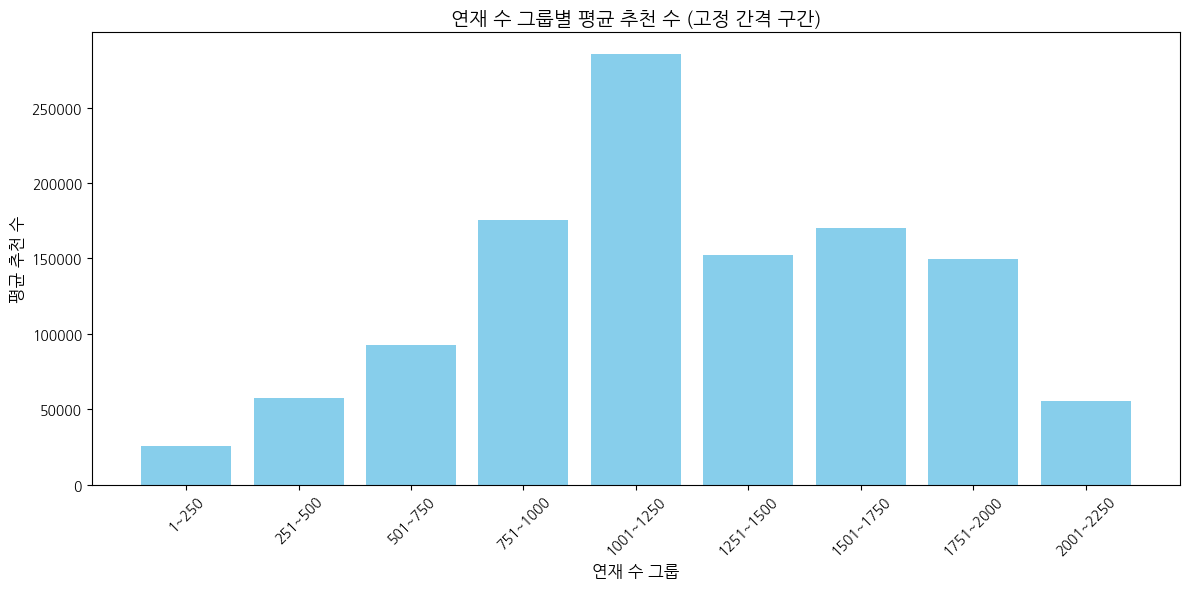

In [11]:
# 연재 수 구간 설정
bins = list(range(0, 2400, 250))  # 250 단위로 나눔
bin_labels = [f"{bins[i]+1}~{bins[i+1]}" for i in range(len(bins)-1)]
data['series_count_group'] = pd.cut(data['series_count'], bins=bins, labels=bin_labels, include_lowest=True)

# 그룹별 평균 추천 수 계산
grouped_data = data.groupby('series_count_group')['recommend_count'].mean().reset_index()
grouped_data.columns = ['연재 수 그룹', '평균 추천 수']

# 결과 출력
print(grouped_data)

# 시각화: 평균 추천 수
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['연재 수 그룹'], grouped_data['평균 추천 수'], color='skyblue')
plt.title('연재 수 그룹별 평균 추천 수 (고정 간격 구간)', fontsize=14)
plt.ylabel('평균 추천 수', fontsize=12)
plt.xlabel('연재 수 그룹', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
